## Ordinary Differential Equation

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Ordinary differential Equation

Consider the differential equation:

$\large{\frac{dy(t)}{dt} = - ky(t)}$ 

with $ k =0.3$

In [3]:
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

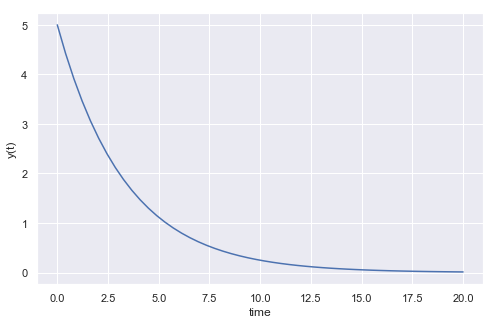

In [4]:
# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.figure(figsize = [8,5])
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Simultaneous differential equations

$\large{\frac{dy(t)}{dt} = - k_1y(t)}$ 

$\large{\frac{dy(t)}{dt} = k_2 \sin(t)}$ 

$\large{\frac{dy(t)}{dt} = k_3 \exp(-t)}$ 

In [5]:
# function that returns dy/dt
def model(y,t,k):
    dy1dt = -k[0] * y[0]
    dy2dt = k[1]*np.sin(t) 
    dy3dt =  k[2]*np.exp(-t) 
    dydt = [dy1dt,dy2dt,dy3dt]
    return dydt

In [6]:
# initial condition
y0 = [5,0,0]

# time points
t = np.linspace(0,20)

# solve 
k1 = 0.1
k2 = 2.0
k3 = 3.0
k =[k1,k2,k3]

'''solve ODEs'''
y = odeint(model,y0,t,args=(k,))


y1 = np.empty_like(t)
y2 = np.empty_like(t)
y3 = np.empty_like(t)
for i in range(len(t)):
    y1[i] = y[i][0]
    y2[i] = y[i][1]
    y3[i] = y[i][2]

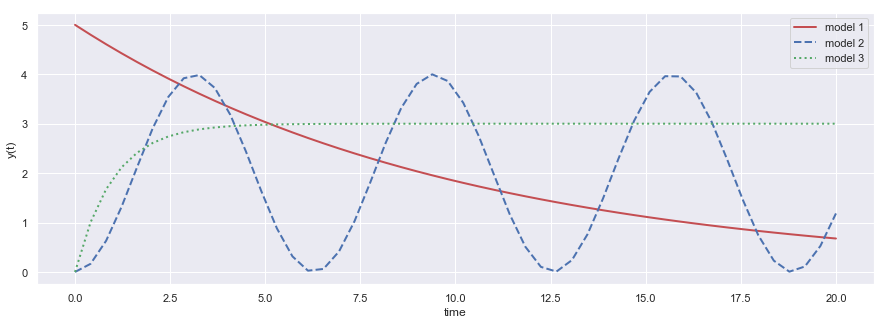

In [7]:
# plot results
plt.figure(figsize = [15,5])
plt.plot(t,y1,'r-',linewidth=2,label='model 1')
plt.plot(t,y2,'b--',linewidth=2,label='model 2')
plt.plot(t,y3,'g:',linewidth=2,label='model 3')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Implementing  $tspan$ method

$\large{2\frac{dx(t)}{dt} = - x(t) + u(t)}$ 

$\large{5 \frac{dy(t)}{dt} = -y(t) +  x(t)}$ 

$u = 2S(t-5),~~ x(0) = 0,~~ y(0) =0$ 

In [11]:
# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

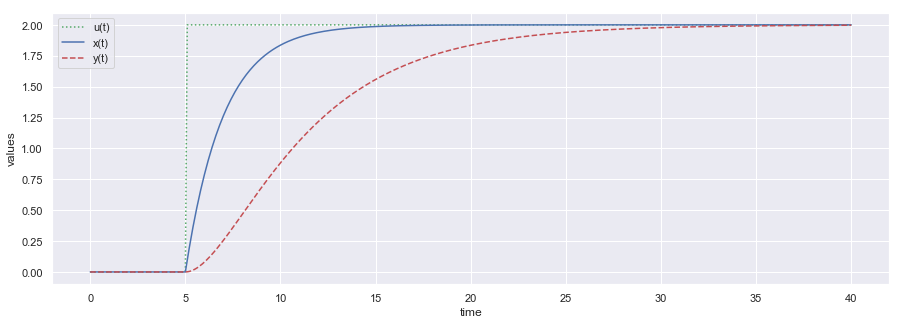

In [13]:
# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.figure(figsize = [15,5])
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()